In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
path = os.getcwd() + "\ex1data1.txt"


In [3]:
data = pd.read_csv(path, header = None, names = ['Population','Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


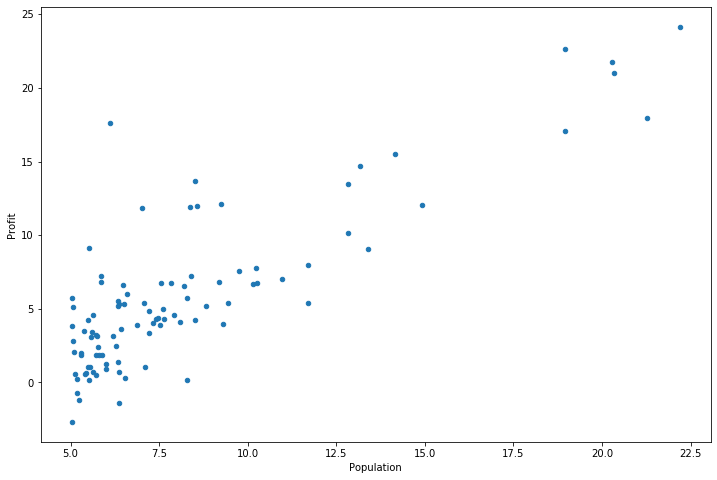

In [5]:
data.plot(kind = "scatter", x = "Population", y = "Profit", figsize =(12,8) )

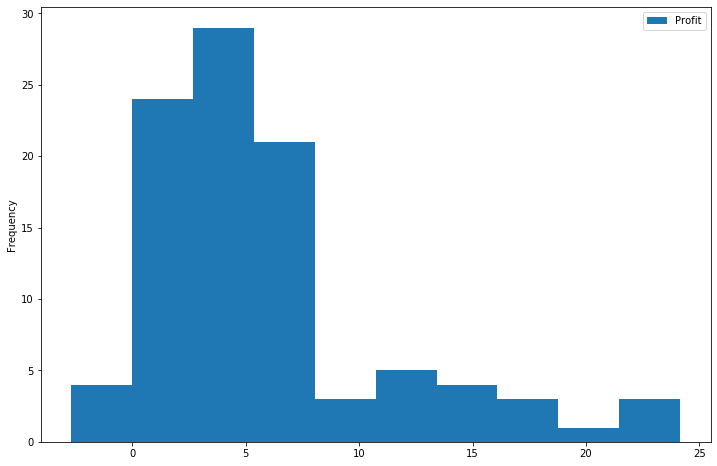

In [6]:
data.plot(kind = "hist", x = "Population", y = "Profit", figsize =(12,8) )

In [7]:
# thetas are the coefficients (I think)
def computeCost(X,y,theta):
    inner = np.power(((X * theta.T) - y),2)
    return np.sum(inner)/(2*len(X))

In [8]:
data.insert(0,'Ones',1)

In [9]:
data.head()

,Ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [10]:
data.shape

(97, 3)

In [11]:
cols = data.shape[1]

In [12]:
cols

3

In [13]:
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

In [14]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

In [15]:
theta #matrix of coeffecients

matrix([[0, 0]])

In [16]:
computeCost(X,y,theta)

32.072733877455676

In [17]:
temp = np.matrix(np.zeros(theta.shape))

In [18]:
temp

matrix([[0., 0.]])

In [19]:
parameters = int(theta.ravel().shape[1]) #ravel flatterns the array

In [27]:
#alpha is the learning rate
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1]) #ravel flatterns the array
    cost = np.zeros(iters)
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters): #parameters = 2 in this example
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha/len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X,y,theta)
    
    return theta, cost

In [28]:
alpha = 0.01
iters = 1000

In [29]:
g,cost = gradientDescent(X,y,theta,alpha,iters)

In [30]:
g

matrix([[-3.24140214,  1.1272942 ]])

In [31]:
computeCost(X,y,g)

4.515955503078912